<a href="https://colab.research.google.com/github/danteacosta/data_science/blob/master/Estudo_de_Fraudes_em_Cart%C3%B5es_de_Cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detecção de Fraudes em Cartões de Crédito

Como meu quarto projeto em Ciência de Dados, vou abordar o problema das fraudes financeiras, também chamadas de *phishing*, algo que bancos e outras instituições financeiras sempre estão buscando combater com melhorias de *software*, pois muitos de seus clientes são lesados por esse tipo de crime. Especialmente durante esse período de quarentena, o número de ocorrências aumentou 44% segundo a Federação Brasileira de Bancos.

<p align=center>
<img src="https://raw.githubusercontent.com/danteacosta/data_science/master/imagens/creditcard.jpg" width="60%"></p>

Dentre os alvos dos criminosos, cartões de crédito são mais visados pois em caso de falha no sistema de detecção, os prejuízos tendem a ser maiores para clientes e empresas.

Na contramão desse tipo de caso, existem os falsos positivos, ou seja, compras voluntárias mas que bloqueiam o cartão por identificações equivocadas. Isso gera transtornos ao cliente que influenciam na satisfação com o serviço.

Nesse contexto, o uso da Inteligência Artificial cresce como maneira de ter mais acertividade, representando um grande nicho na Ciência de Dados. 

A partir de um grande número de casos ao longo dos anos, melhorias em algoritmos de Aprendizagem de Máquina implicam em uma economia de milhões, por conta disso a busca por aprimoramentos que evitem fraudes é contínua.

## Importando os Dados

O *dataset* possui 290 mil transações, esses dados de grandes empresas de cartão de crédito representa as operações financeiras que aconteceram no período de dois dias. Porém, pouquíssimos casos de fraude ocorreram e isso implica em um conjunto de dados desbalanceado, algo a ser corrigido posteriormente. Por questões de privacidade, as colunas são todas numéricas e foram descaracterizadas.

<p align=center>
<img src="https://raw.githubusercontent.com/danteacosta/data_science/master/imagens/creditcard2.jpg" width="50%"></p>

[No site do Kaggle](https://www.kaggle.com/mlg-ulb/creditcardfraud), que disponibilizou o *dataset*, foi informado que as variáveis passaram por uma transformação conhecida como Análise de Componentes Principais (*Principal Component Analysis* - PCA), como forma de lidar com diversas colunas e atributos mantendo o máximo possível de informação.

In [21]:
# importar os pacotes necessários
!pip install -q scikit-plot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

sns.set_style('dark')

Para facilitar a aquisição dos dados, criei um *link* com acesso direto ao `csv`. Com isso, basta importar o conjunto de dados usando o método `pd.read_csv()`.

In [3]:
file_path = "https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1"

# importar os dados para um dataframe
df=pd.read_csv(file_path)

Com os dados importados para dentro de uma estrutura *Dataframe* - e não havendo a necessidade de mais nenhum ajuste ou configuração nesta etapa, pode-se iniciar uma análise exploratória dos dados a fim de preparar um modelo de *Machine Learning*.

## Análise Exploratória
Como estamos vendo o conjunto de dados pela primeira vez, vamos buscar entender melhor como a informação está distribuída.

In [5]:
#Vendo as 5 primeiras entradas
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Já nas entradas iniciais vemos a forma que as variáveis foram modificadas a partir do PCA, todas essas colunas são responsáveis pelo resultado da coluna `Class`, também chamada de variável-alvo.

In [6]:
#Vendo informações das variáveis e seus preenchimentos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Vemos que todas as colunas estão devidamente preenchidas e de fato são todas numéricas.

[]

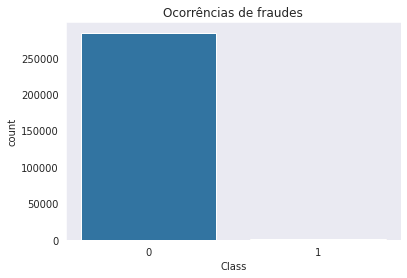

In [7]:
#Gráfico entre as colunas da classe Class
fig, ax = plt.subplots()
sns.countplot('Class',data=df,ax=ax)
ax.set_title('Ocorrências de fraudes')
plt.plot()

De fato o número de casos de fraudes comparado ao total é tão pequeno que ele sequer aparece em um gráfico de barras. Vamos agora ver a frequência das variáveis `Time` e `Amount` a partir de histogramas.

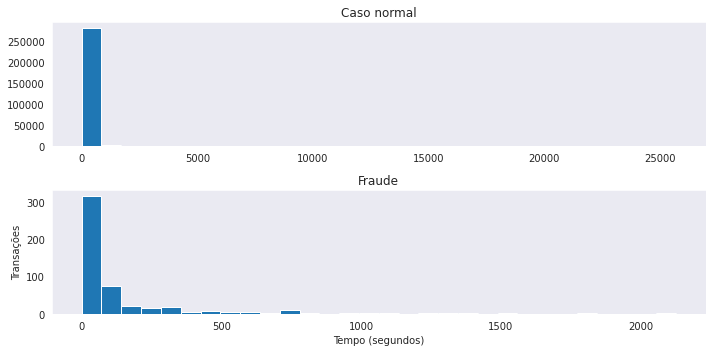

In [17]:
#Histograma da classe Amount
fig, ax = plt.subplots(nrows=2,ncols=1, figsize=(10,5))
ax[0].hist(df.Amount[df.Class==0], bins=30)
ax[0].set_title('Caso normal')
ax[1].hist(df.Amount[df.Class==1], bins=30)
ax[1].set_title('Fraude')
plt.xlabel('Tempo (segundos)')
plt.ylabel('Transações')
plt.tight_layout()



Nesse caso não temos muita diferença

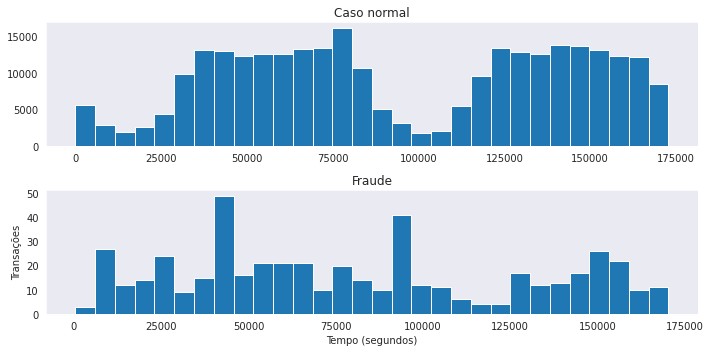

In [18]:
#Histograma da variável Time
fig, ax = plt.subplots(nrows=2,ncols=1, figsize=(10,5))
ax[0].hist(df.Time[df.Class==0], bins=30)
ax[0].set_title('Caso normal')
ax[1].hist(df.Time[df.Class==1], bins=30)
ax[1].set_title('Fraude')
plt.xlabel('Tempo (segundos)')
plt.ylabel('Transações')
plt.tight_layout()

No caso da coluna `Time` também não temos um padrão muito claro para tirar conclusões sobre o gráfico.

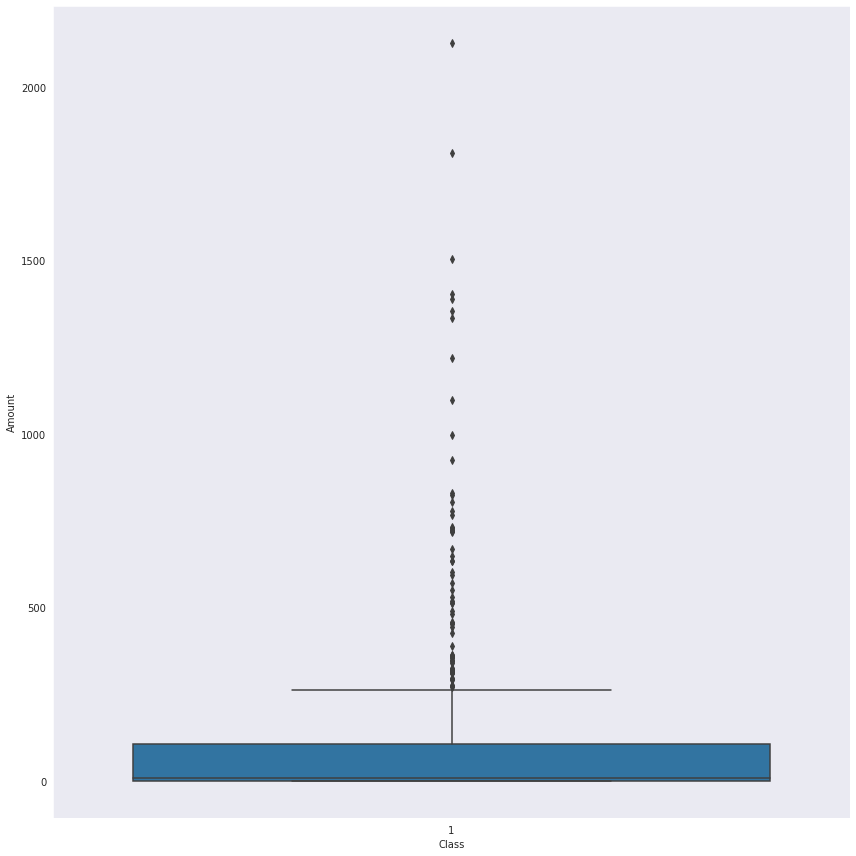

In [28]:
#Boxplot da coluna Amount para fraudes
df_class_1 = df[df.Class == 1]
fig, ax = plt.subplots(figsize=(12,12))
sns.boxplot(df_class_1.Class, df_class_1.Amount, ax=ax)
plt.tight_layout()

Constata-se a presença de alguns valores aberrantes, também chamados de *outliers*. Para termos uma noção mais geral da coluna, vamos ver o resumo estatístico.

In [29]:
#Resumo estatístico da variável
df_class_1['Amount'].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

A partir do desvio-padrão entendemos melhor a discrepância de alguns valores para o resto dos casos.

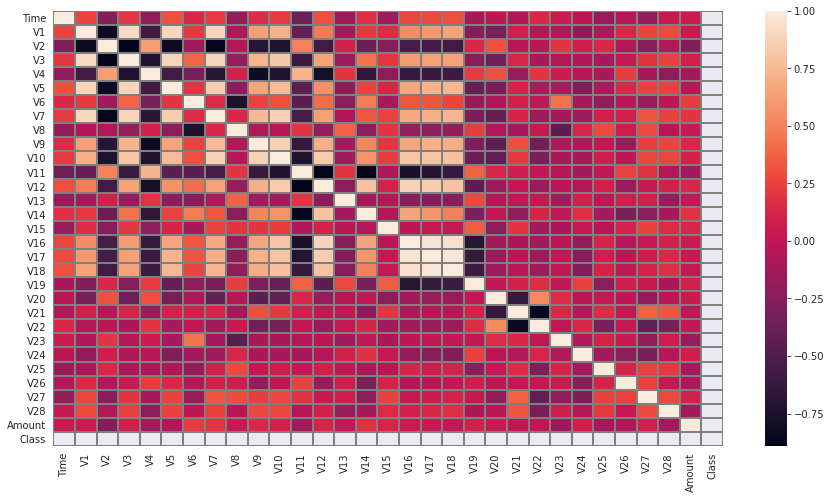

In [22]:
#Mapa de calor das colunas para o caso de fraudes
fig, ax = plt.subplots(figsize=(15,8))
sns.heatmap(df_class_1.corr(),linecolor='gray', linewidths=1,ax=ax)
plt.show()

Vemos algumas colunas sem muita semelhança, porém temos outras com uma correlação considerável. Esses casos são importantes porque esse tipo de padrão permite a partir de técnicas de Aprendizagem de Máquina prever melhor os casos fraudulentos.

Em resumo, notamos que:

*   Há um desbalanceamento dos casos normais e de fraudes

*   Tudo está devidamente preenchido
*   `Time` e `Amount` ainda precisam ser normalizados



## Preparação dos Dados
Como mencionado, precisamos ainda resolver as questões de colunas que não estão normalizadas no conjunto de dados, além de preparar o *dataset* antes de submetê-lo a técnicas de aprendizagem de máquina.

In [6]:
#Normalizando colunas Time e Amount
df_normal=df.copy()
std_scaler=StandardScaler()
df_normal['std_amount'] = std_scaler.fit_transform(df_normal['Amount'].values.reshape(-1, 1))
df_normal['std_time'] = std_scaler.fit_transform(df_normal['Time'].values.reshape(-1, 1))
#Tirando essas variáveis após normalizar
df_normal.drop(['Time','Amount'],axis=1,inplace=True)


In [7]:
#Conferindo o dataset após a transformação
df_normal.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,std_amount,std_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


Foi feita a substituição por essas novas colunas . 

**Dividindo os dados**

Feito isso, precisamos ter uma divisão entre o *dataset* para a parte de treino e a de teste. Assim, temos um parâmetro para certificar se o balanceamento foi bem feito e as divisões estejam proporcionais.

In [8]:
#Separar as variáveis
X=df_normal.drop('Class',axis=1)
y=df_normal['Class']
#Divisão de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y,shuffle=True)

**Balanceamento de dados**

Temos várias técnicas de pré-processamento, mas em um cenário que o número de fraudes chega a ser menor que 0,2% de nosso conjunto, faz mais sentido utilizar a técnica Under-Sampling para preservar essa minoria em detrimento da maioria, até porque o caso mais crítico é justamente a ocorrência de transações irregulares. 

In [9]:
#Técnica Under-Sampling
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_sample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


## Modelo de Machine Learning
Agora a partir do modelo de Regressão Logística e de Árvore de Decisão vamos classificar e verificar a eficiência após ter tratado os dados. Para isso, já usaremos X e y tratados pelo método Under-Sampling. 

In [29]:
#Construção do modelo de Regressão Logística
model1 = LogisticRegression()
model1.fit(X_rus, y_rus)
#Construção do modelo de Árvore de Decisão
model2 = DecisionTreeClassifier(max_depth=4, criterion="entropy")
model2.fit(X_train, y_train)

# fazer as previsões em cima dos dados de teste
y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test)

## Avaliar o desempenho do modelo
Após ter nossos modelos, vamos agora a partir de relatórios ver se seus resultados foram satisfatórios.

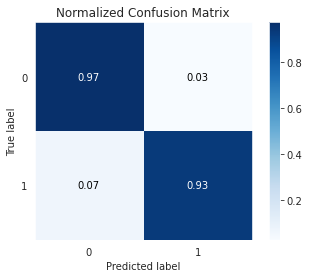

In [23]:
# Matriz de confusão para Regressão Logística
skplt.metrics.plot_confusion_matrix(y_test, y_pred1, normalize=True)

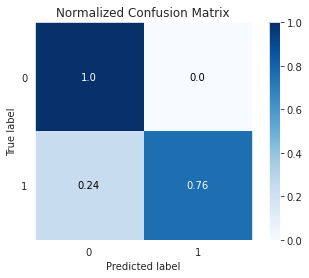

In [28]:
#Matriz de Confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred2, normalize=True)

In [24]:
#Tabela de resultados com Regressão Logística
print("Resultados\n",classification_report(y_test, y_pred1, digits=2))

Resultados
               precision    recall  f1-score   support

           0       1.00      0.97      0.98     71079
           1       0.05      0.93      0.09       123

    accuracy                           0.97     71202
   macro avg       0.52      0.95      0.54     71202
weighted avg       1.00      0.97      0.98     71202



In [27]:
#Tabela de resultados da Árvore de Decisão
print("Resultados\n",classification_report(y_test, y_pred2, digits=2))

Resultados
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.86      0.76      0.81       123

    accuracy                           1.00     71202
   macro avg       0.93      0.88      0.91     71202
weighted avg       1.00      1.00      1.00     71202



Na Árvore de Decisão identificamos com uma ligeira superioridade os casos comuns, mas para os casos críticos de fraude ainda há uma superioridade considerável com a Regressão Logística.

## Conclusão

O maior problema com *dataset* foi resolver o desbalanceamento antes de aplicar os modelos nos dados, fora isso não houve problema com a ausência de dados ou variáveis a ser modificadas. 

Pelos modelos conseguimos resultados bons, melhor no caso de Regressão, mas que ainda poderiam ser melhorados com ajustes de parâmetro ou outros modelos, algo a ser avaliado posteriormente. 